In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('oil trades.csv', sep=';')
df

,Countries,Crude Imports,Product Imports,Crude Exports,Product Exports
0,Canada,23.909,30.636,197.439,33.542
1,Mexico,0.000,58.959,52.884,8.238
2,US,304.670,112.861,138.549,244.436
3,S. & Cent. America,21.826,105.767,124.147,23.639
4,Europe,467.741,197.500,36.379,110.523
5,Russia,0.024,1.875,263.565,140.670
6,Other CIS,15.941,6.889,87.121,17.713
7,Iraq,0.005,8.333,176.096,12.305
8,Kuwait,0.000,0.936,88.362,24.259
9,Saudi Arabia,0.013,16.142,323.215,57.653


In [ ]:
data = df.drop("Countries", axis=1)
counries = df["Countries"].values
data = data.astype(np.float)
data.head()

<ipython-input-188-08e037fc7ae9>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


,Crude Imports,Product Imports,Crude Exports,Product Exports
0,23.909,30.636,197.439,33.542
1,0.000,58.959,52.884,8.238
2,304.670,112.861,138.549,244.436
3,21.826,105.767,124.147,23.639
4,467.741,197.500,36.379,110.523


In [ ]:
print(counries.transpose())

['Canada' 'Mexico' 'US' 'S. & Cent. America' 'Europe ' 'Russia'
 'Other CIS' 'Iraq' 'Kuwait' 'Saudi Arabia' 'United Arab Emirates'
 'Other Middle East' 'North Africa' 'West Africa' 'East & S. Africa'
 'Australasia' 'China' 'India' 'Japan' 'Singapore' 'Other Asia Pacific']


In [ ]:
X = data.values[:,:]
X = np.nan_to_num(X)
X

array([[2.39090e+01, 3.06360e+01, 1.97439e+02, 3.35420e+01],
       [0.00000e+00, 5.89590e+01, 5.28840e+01, 8.23800e+00],
       [3.04670e+02, 1.12861e+02, 1.38549e+02, 2.44436e+02],
       [2.18260e+01, 1.05767e+02, 1.24147e+02, 2.36390e+01],
       [4.67741e+02, 1.97500e+02, 3.63790e+01, 1.10523e+02],
       [2.40000e-02, 1.87500e+00, 2.63565e+02, 1.40670e+02],
       [1.59410e+01, 6.88900e+00, 8.71210e+01, 1.77130e+01],
       [5.00000e-03, 8.33300e+00, 1.76096e+02, 1.23050e+01],
       [0.00000e+00, 9.36000e-01, 8.83620e+01, 2.42590e+01],
       [1.30000e-02, 1.61420e+01, 3.23215e+02, 5.76530e+01],
       [3.16300e+00, 3.17880e+01, 1.46072e+02, 8.67320e+01],
       [1.86650e+01, 1.96640e+01, 9.69670e+01, 6.24360e+01],
       [9.29600e+00, 3.08480e+01, 8.54210e+01, 4.53750e+01],
       [4.71000e-01, 4.60320e+01, 1.87365e+02, 8.55500e+00],
       [1.23680e+01, 4.10930e+01, 4.82700e+00, 2.74700e+00],
       [1.48880e+01, 2.61860e+01, 9.22800e+00, 5.36800e+00],
       [5.25961e+02, 1.0

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

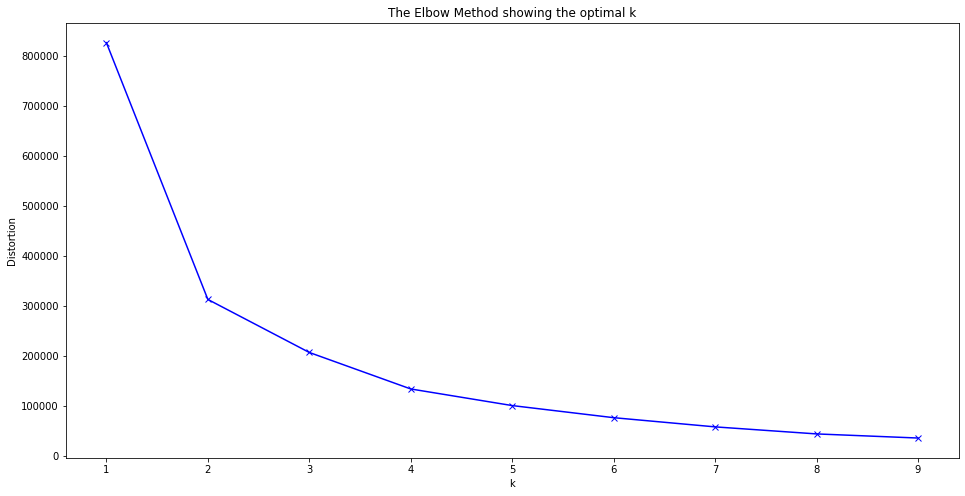

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
K = range(3,5)
for k in K:
  km = KMeans(init = "random", n_clusters=k, n_init = 12)
  km.fit_predict(X)
  score = silhouette_score(X, km.labels_, metric='euclidean')

  print('Silhouetter Score for k = %d: %.3f' % (k, score))

Silhouetter Score for k = 3: 0.381
Silhouetter Score for k = 4: 0.351


In [ ]:
clusterNum = 3
k_means = KMeans(init = "random", n_clusters=clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
centers = k_means.cluster_centers_
print(centers, labels)

[[388.868      153.9565      53.6685     136.68375   ]
 [  4.5975      22.46766667 215.62533333  56.57616667]
 [ 43.25436364  43.14227273  50.03909091  30.81854545]] [1 2 0 2 0 1 2 1 2 1 1 2 2 1 2 2 0 2 2 2 0]


In [ ]:
data["Countries"] = counries
data["Clus_km"] = labels
data

,Crude Imports,Product Imports,Crude Exports,Product Exports,Countries,Clus_km
0,23.909,30.636,197.439,33.542,Canada,1
1,0.000,58.959,52.884,8.238,Mexico,2
2,304.670,112.861,138.549,244.436,US,0
3,21.826,105.767,124.147,23.639,S. & Cent. America,2
4,467.741,197.500,36.379,110.523,Europe,0
5,0.024,1.875,263.565,140.670,Russia,1
6,15.941,6.889,87.121,17.713,Other CIS,2
7,0.005,8.333,176.096,12.305,Iraq,1
8,0.000,0.936,88.362,24.259,Kuwait,2
9,0.013,16.142,323.215,57.653,Saudi Arabia,1


In [ ]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

for i in data.values:
  n = i[len(data.values[0,:])-1]
  if n == 0:
    cluster_0.append(i[-2])
  elif n == 1:
    cluster_1.append(i[-2])
  elif n == 2:
    cluster_2.append(i[-2])
print("Cluster 0 ", cluster_0, "\n","Cluster 1 ",cluster_1,"\n","Cluster 2 ", cluster_2, "\n")

Cluster 0  ['US', 'Europe ', 'China', 'Other Asia Pacific'] 
 Cluster 1  ['Canada', 'Russia', 'Iraq', 'Saudi Arabia', 'United Arab Emirates', 'West Africa'] 
 Cluster 2  ['Mexico', 'S. & Cent. America', 'Other CIS', 'Kuwait', 'Other Middle East', 'North Africa', 'East & S. Africa', 'Australasia', 'India', 'Japan', 'Singapore'] 



<ipython-input-166-5c92921e2a1b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 2], X[:, 3], c=labels.astype(np.float), alpha=1)


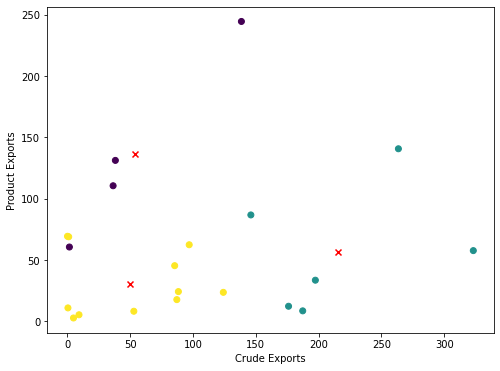

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 2], X[:, 3], c=labels.astype(np.float), alpha=1)
plt.xlabel("Crude Exports")
plt.ylabel("Product Exports")
plt.scatter(centers[:, 2], centers[:, 3], marker='x', c="r")
plt.show()

<ipython-input-167-27b66055c9a4>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=1)


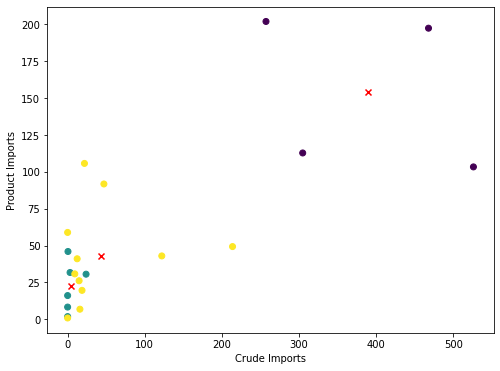

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=1)
plt.xlabel("Crude Imports")
plt.ylabel("Product Imports")
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c="r")
plt.show()

<ipython-input-168-4ff4e0572c00>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 2], c=labels.astype(np.float), alpha=1)


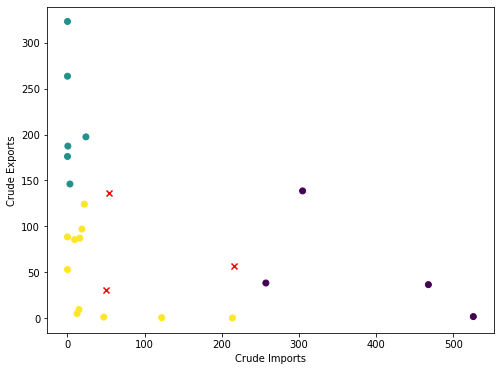

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 2], c=labels.astype(np.float), alpha=1)
plt.xlabel("Crude Imports")
plt.ylabel("Crude Exports")
plt.scatter(centers[:, 2], centers[:, 3], marker='x', c="r")
plt.show()

<ipython-input-204-c1dce63c49d7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], c=labels.astype(np.float), alpha=1)


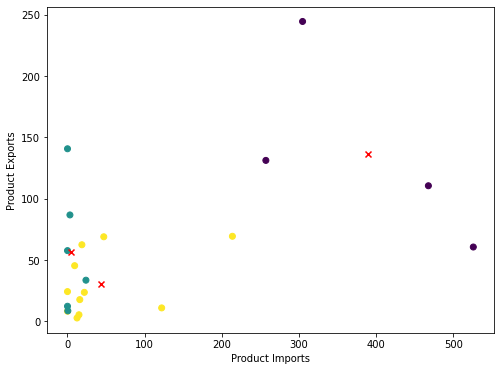

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 3], c=labels.astype(np.float), alpha=1)
plt.xlabel("Product Imports")
plt.ylabel("Product Exports")
plt.scatter(centers[:, 0], centers[:, 3], marker='x', c="r")
plt.show()

<ipython-input-170-b819920e2c2a>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 0], X[:, 2], X[:, 1], c=labels.astype(np.float))


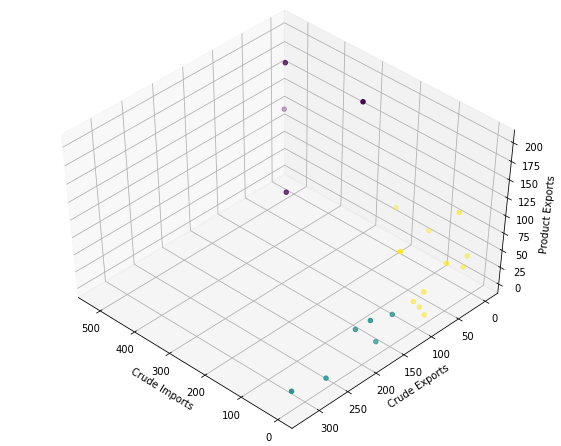

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel("Crude Imports")
ax.set_ylabel("Crude Exports")
ax.set_zlabel("Product Exports")

ax.scatter(X[:, 0], X[:, 2], X[:, 1], c=labels.astype(np.float))

In [ ]:
data.groupby('Clus_km').mean()

,Crude Imports,Product Imports,Crude Exports,Product Exports
Clus_km,,,,
0,388.868000,153.956500,53.668500,136.683750
1,4.597500,22.467667,215.625333,56.576167
2,43.254364,43.142273,50.039091,30.818545


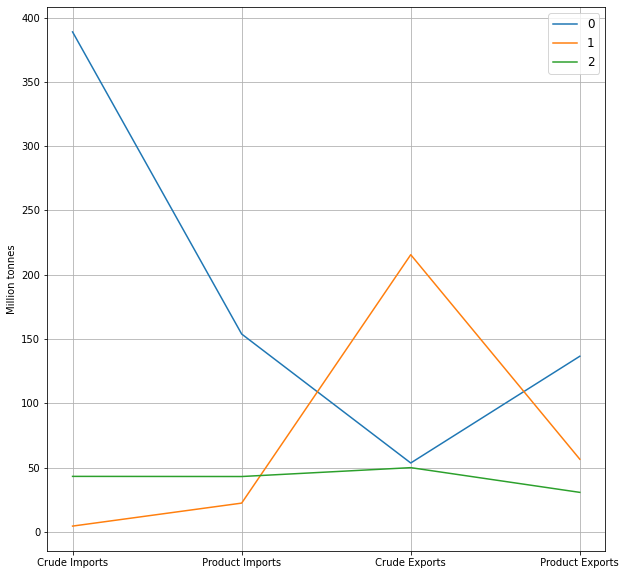

In [ ]:
plt.figure(figsize=(10, 10))
plt.ylabel("Million tonnes")
clusters_arr = np.arange(0, clusterNum, 1)
for i in clusters_arr:
  plt.plot(data.groupby('Clus_km').mean().iloc[i, :], label=i)
plt.grid(True)
plt.legend(loc='best', fontsize=12)